Przykładowe kody znaleźć można tutaj https://plotly.com/python/funnel-charts/

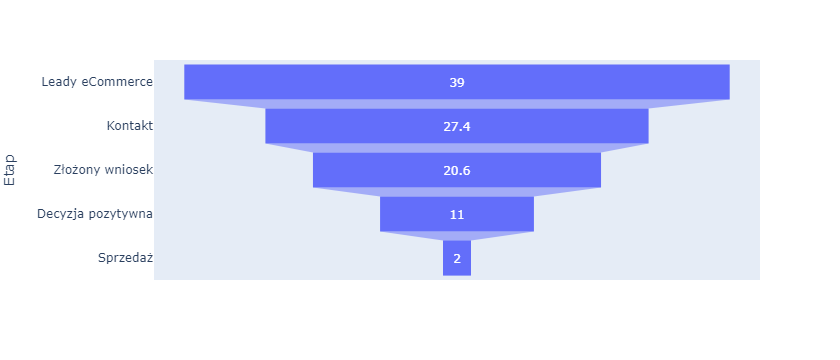

In [4]:
import plotly.express as px
import os
from pathlib import Path

foto_path = Path('./foto/')

data = dict(
    licznosc=[39, 27.4, 20.6, 11, 2],
    Etap=["Leady eCommerce", "Kontakt", "Złożony wniosek", "Decyzja pozytywna", "Sprzedaż"])
fig = px.funnel(data, x='licznosc', y='Etap')

fig.write_image(os.path.join(foto_path, "08_funnel_static.png"), format="png", engine = "orca")
fig.write_html(os.path.join(foto_path, "09_funnel_dynamic.html"))

fig.show()

Można również wrzucić dwa procesy

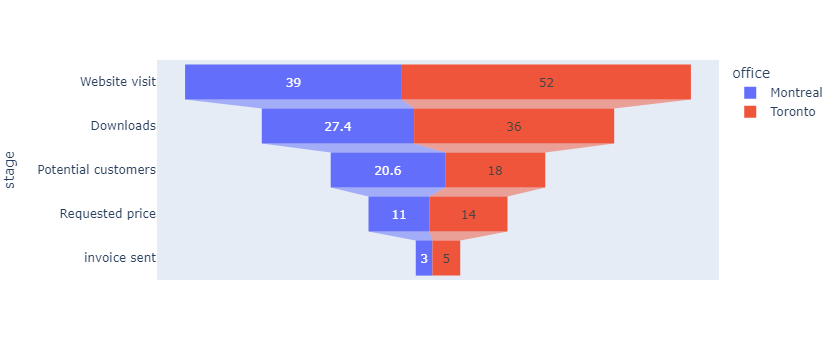

In [5]:
import plotly.express as px
import pandas as pd
stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"]
df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11, 3], stage=stages))
df_mtl['office'] = 'Montreal'
df_toronto = pd.DataFrame(dict(number=[52, 36, 18, 14, 5], stage=stages))
df_toronto['office'] = 'Toronto'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='office')
fig.show()

Tuningowanie składowych

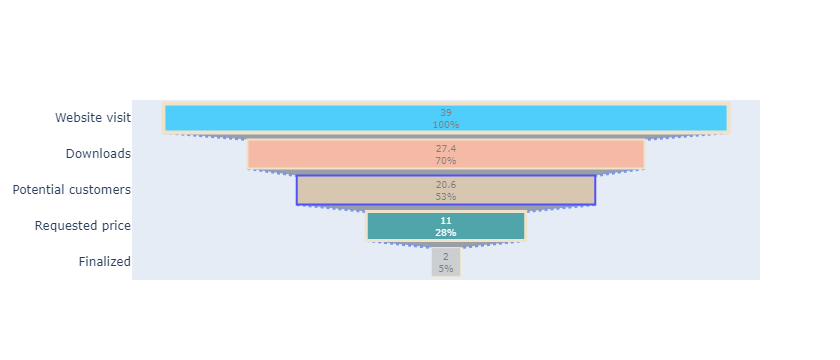

In [6]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "Finalized"],
    x = [39, 27.4, 20.6, 11, 2],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

Bardziej rozbudowana wersja lejka

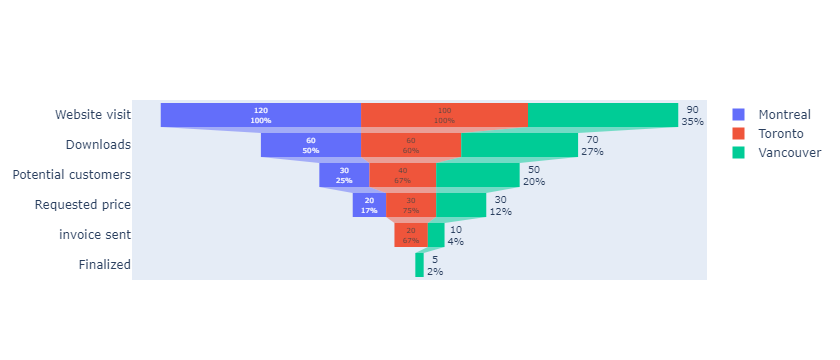

In [7]:
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Montreal',
    y = ["Leady eCommerce", "Kontakt", "Złożony wniosek", "Decyzja pozytywna"],
    x = [120, 60, 30, 20],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Toronto',
    orientation = "h",
    y = ["Leady eCommerce", "Kontakt", "Złożony wniosek", "Decyzja pozytywna"],
    x = [100, 60, 40, 30, 20],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Vancouver',
    orientation = "h",
    y = ["Leady eCommerce", "Kontakt", "Złożony wniosek", "Decyzja pozytywna", "Sprzedaż"],
    x = [90, 70, 50, 30, 10, 5],
    textposition = "outside",
    textinfo = "value+percent total"))

fig.show()